# Lab #4

Student Name: Nabhanya Sharma

Student ID: 500826185

Video demo: https://www.loom.com/share/fd4a5b45f97e434d9b10678418e06764?sid=d3d6b116-2377-4810-959d-0f9c26ea8644

Part A

In [55]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Q1



In [56]:
data_points = np.array([[2, 10], [2, 5], [8, 4], [5, 8], [7, 5], [6, 4], [1, 2], [4, 9]])
initial_centers = np.array([[2, 5], [8, 4], [4, 9]])

num_clusters = initial_centers.shape[0]
num_points = data_points.shape[0]
distances = np.zeros((num_points, num_clusters))

for i in range(num_clusters):
    distances[:, i] = np.linalg.norm(data_points - initial_centers[i], axis=1)

cluster_assignments = np.argmin(distances, axis=1)

new_centers = np.zeros(initial_centers.shape)

for i in range(num_clusters):
    new_centers[i] = np.mean(data_points[cluster_assignments == i], axis=0)

clusters = [[] for _ in range(num_clusters)]
for i, point in enumerate(data_points):
    clusters[cluster_assignments[i]].append(point)
print("The new clusters:")
for i, cluster in enumerate(clusters):
    print(f"Cluster {i+1}: {cluster}")

The new clusters:
Cluster 1: [array([2, 5]), array([1, 2])]
Cluster 2: [array([8, 4]), array([7, 5]), array([6, 4])]
Cluster 3: [array([ 2, 10]), array([5, 8]), array([4, 9])]


Q2

In [57]:
print("The centers of the new clusters:")
for i, center in enumerate(new_centers):
    print(f"Cluster {i+1} center: {center}")

The centers of the new clusters:
Cluster 1 center: [1.5 3.5]
Cluster 2 center: [7.         4.33333333]
Cluster 3 center: [3.66666667 9.        ]


Q3

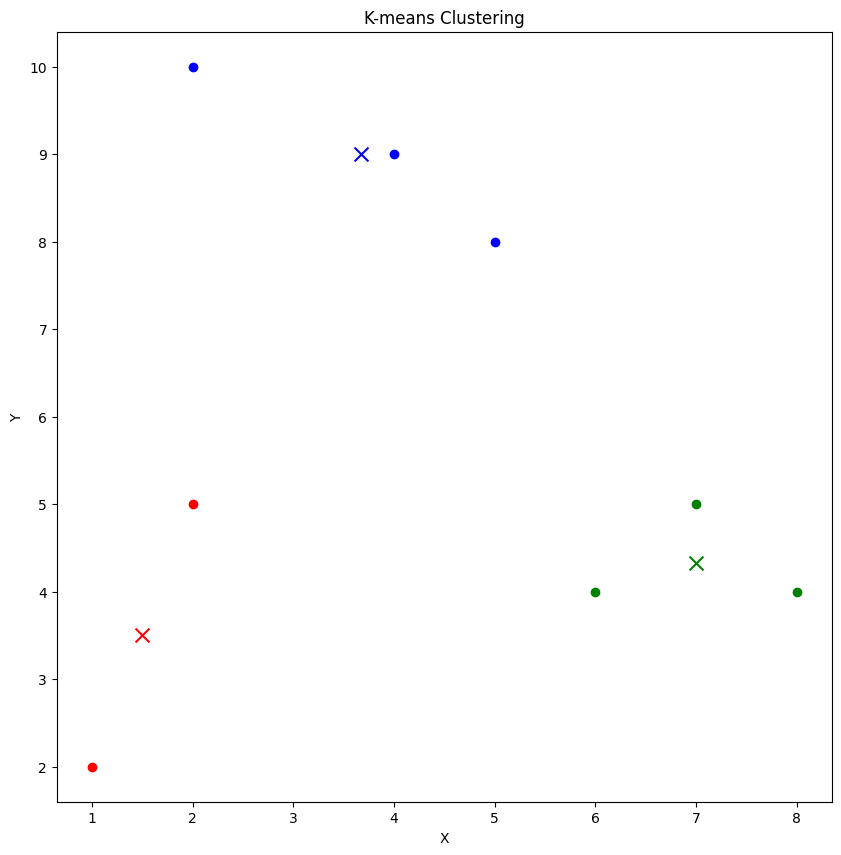

In [58]:
colors = ['red', 'green', 'blue']
plt.figure(figsize=(10, 10))
for i, point in enumerate(data_points):
    plt.scatter(point[0], point[1], color=colors[cluster_assignments[i]], marker='o')

for i, center in enumerate(new_centers):
    plt.scatter(center[0], center[1], color=colors[i], marker='x', s=100)

plt.xlabel('X')
plt.ylabel('Y')
plt.title('K-means Clustering')
plt.show()

Q6

In [59]:
dataset2=pd.read_csv("https://raw.githubusercontent.com/tofighi/MachineLearning/master/datasets/heart.csv")

sbp = np.array(dataset2['sbp'])
tobacco = np.array(dataset2['tobacco'])

train_data = np.vstack((sbp[:300], tobacco[:300])).T
test_data = np.vstack((sbp[300:], tobacco[300:])).T

def k_means(data, k, max_iterations=100):
    centroids = data[np.random.choice(range(data.shape[0]), size=k, replace=False)]

    for _ in range(max_iterations):

        distances = np.linalg.norm(data[:, np.newaxis] - centroids, axis=2)
        labels = np.argmin(distances, axis=1)

        new_centroids = np.array([data[labels == i].mean(axis=0) for i in range(k)])

        if np.all(centroids == new_centroids):
            break

        centroids = new_centroids

    return centroids, labels

k = 2
centroids, train_labels = k_means(train_data, k)

train_labels_actual = np.array(dataset2['chd'][:300])
train_accuracy1 = np.mean(train_labels_actual == train_labels)
print('Accuracy: ',train_accuracy1)

Accuracy:  0.61


Q7

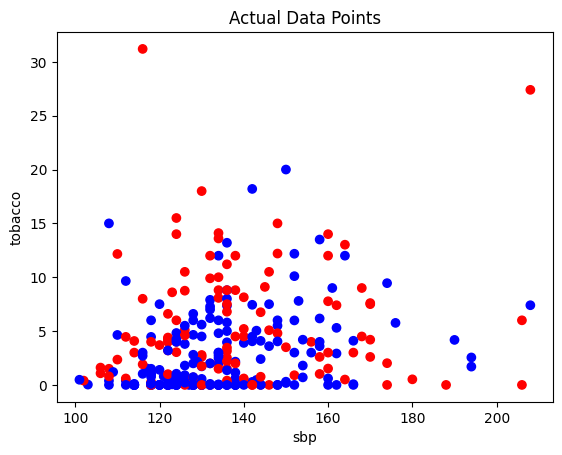

In [60]:
colors = ['red' if label == 1 else 'blue' for label in train_labels_actual]
plt.scatter(sbp[:300], tobacco[:300], c=colors)
plt.xlabel('sbp')
plt.ylabel('tobacco')
plt.title('Actual Data Points')
plt.show()

Q8

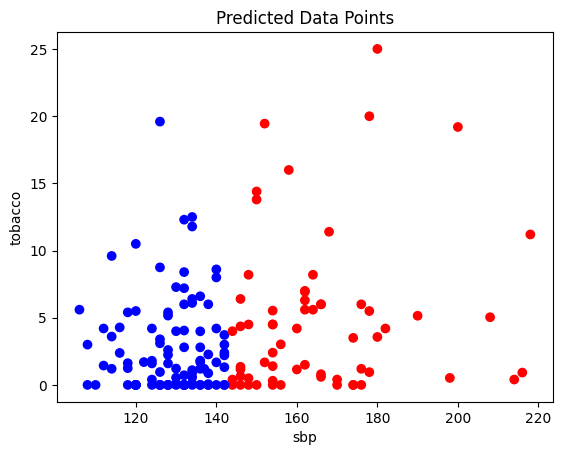

In [61]:
distances = np.linalg.norm(test_data[:, np.newaxis] - centroids, axis=2)
test_labels = np.argmin(distances, axis=1)

colors = ['red' if label == 1 else 'blue' for label in test_labels]
plt.scatter(sbp[300:], tobacco[300:], c=colors)
plt.xlabel('sbp')
plt.ylabel('tobacco')
plt.title('Predicted Data Points')
plt.show()

test_labels_actual = np.array(dataset2['chd'][300:])

### Part B

Q9

In [62]:
#As you will see below in the final plot, the NN clustering algorithm produces different results than K-Means.

threshold = 4

def euclidean_distance(p1, p2):
    return np.sqrt(np.sum((p1 - p2) ** 2))

num_points = data_points.shape[0]
cluster_assignments = np.zeros(num_points, dtype=int)
num_clusters = 0

for i, point in enumerate(data_points):
    nearest_cluster = -1
    min_distance = threshold + 1

    for j in range(num_clusters):
        cluster_center = data_points[cluster_assignments == j].mean(axis=0)
        distance = euclidean_distance(point, cluster_center)

        if distance < min_distance:
            nearest_cluster = j
            min_distance = distance

    if min_distance <= threshold:
        cluster_assignments[i] = nearest_cluster
    else:
        cluster_assignments[i] = num_clusters
        num_clusters += 1

Q10

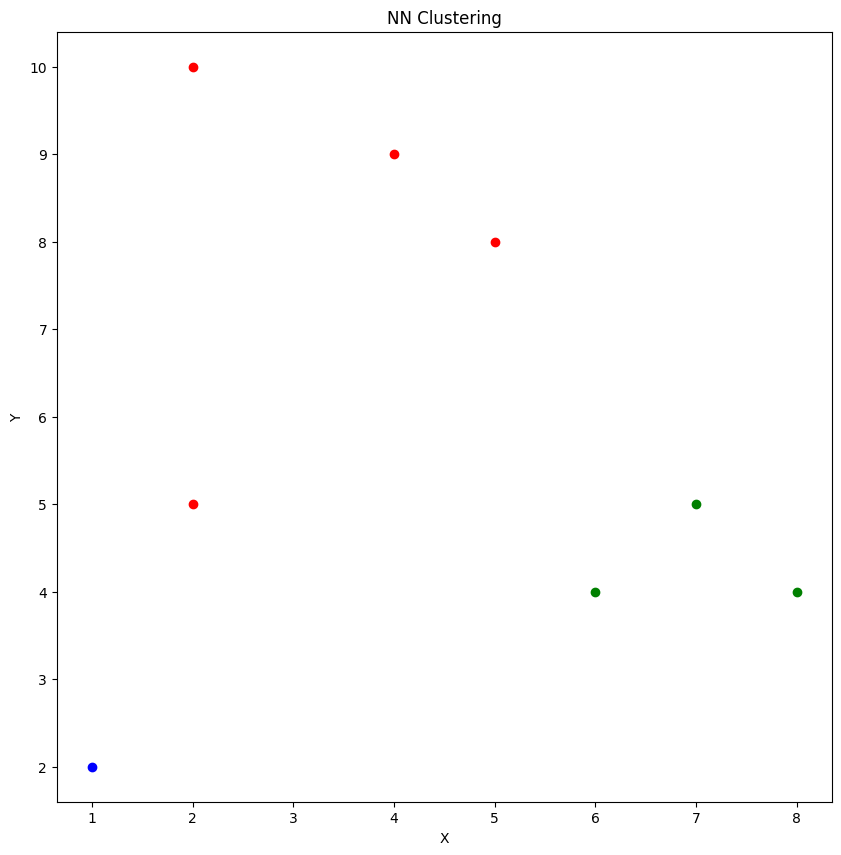

In [63]:
colors = ['red', 'green', 'blue']
plt.figure(figsize=(10, 10))
for i, point in enumerate(data_points):
    plt.scatter(point[0], point[1], color=colors[cluster_assignments[i]], marker='o')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('NN Clustering')
plt.show()

Q11

In [64]:
#K-means algorithm advantages:
#Efficient and scalable for larger datasets
#Allows specifying the number of clusters

#Disadvantages on larger datasets:
#Sensitive to initial cluster centers, leading to different results
#May converge to local optima, not guaranteed to find the global optimum

#Nearest Neighbor algorithm advantages:
#Simplicity and easier to implement
#Does not require specifying the number of clusters

#Disadvantages on larger datasets:
#Computationally expensive as it requires comparing each point with all existing clusters
#Sensitive to the choice of threshold value
#Does not guarantee optimal clustering results

Q12

In [65]:
labels=np.array(dataset2['chd'])

train_data = np.vstack((sbp[:300], tobacco[:300])).T
test_data = np.vstack((sbp[300:], tobacco[300:])).T
test_labels_actual = labels[300:]

def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

def nn_clustering(data, threshold):
    clusters = [data[0]]

    for point in data[1:]:
        distances = [euclidean_distance(point, c) for c in clusters]
        min_distance = np.min(distances)

        if min_distance <= threshold:
            nearest_cluster_idx = np.argmin(distances)
            nearest_cluster = clusters[nearest_cluster_idx]
            nearest_cluster = np.vstack((nearest_cluster, point))
            clusters[nearest_cluster_idx] = nearest_cluster
        else:
            clusters.append(point)

    return clusters

def assign_labels(clusters, data):
    labels = np.zeros(data.shape[0])

    for i, cluster in enumerate(clusters):
        distances = [euclidean_distance(point, cluster) for point in data]
        nearest_idx = np.argmin(distances)
        labels[nearest_idx] = i

    return labels

threshold = 10
clusters = nn_clustering(train_data, threshold)
train_labels_actual = labels[:300]
train_labels_predicted = assign_labels(clusters, train_data)
train_accuracy = np.mean(train_labels_actual == train_labels_predicted)
print("Accuracy:", train_accuracy)

Accuracy: 0.56


### Part C

k-means

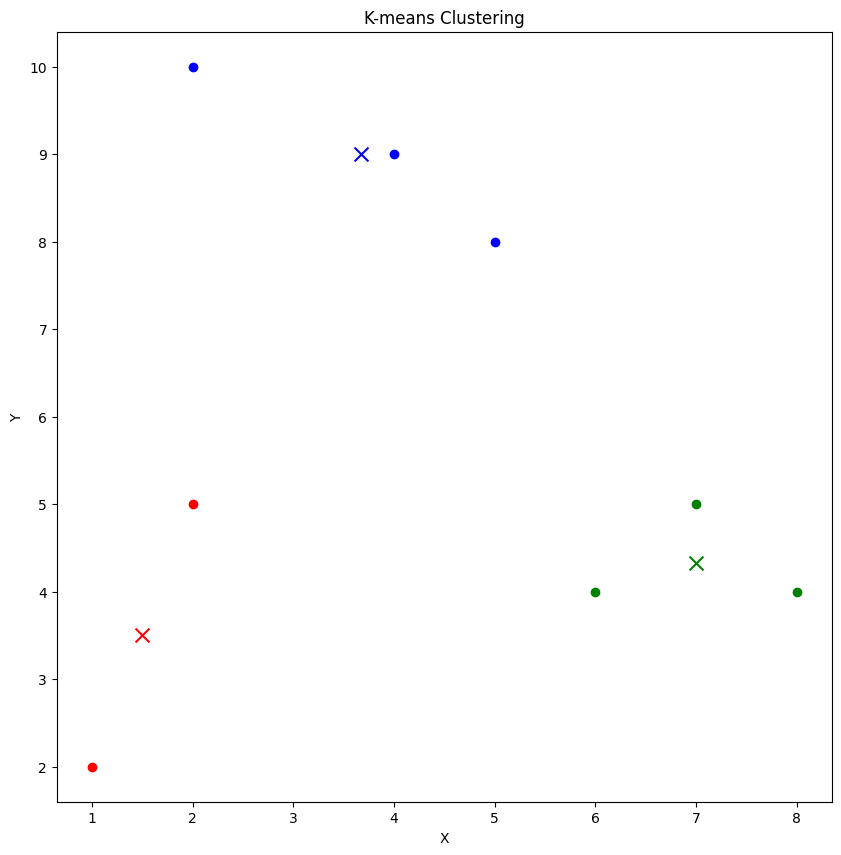

In [66]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=initial_centers.shape[0], init=initial_centers, n_init=1)
kmeans.fit(data_points)

cluster_assignments = kmeans.labels_
new_centers = kmeans.cluster_centers_

clusters = [[] for _ in range(initial_centers.shape[0])]
for i, point in enumerate(data_points):
    clusters[int(cluster_assignments[i])].append(point)

colors = ['red', 'green', 'blue']
plt.figure(figsize=(10, 10))
for i, point in enumerate(data_points):
    plt.scatter(point[0], point[1], color=colors[int(cluster_assignments[i])], marker='o')

for i, center in enumerate(new_centers):
    plt.scatter(center[0], center[1], color=colors[i], marker='x', s=100)

plt.xlabel('X')
plt.ylabel('Y')
plt.title('K-means Clustering')
plt.show()

Nearest Neighbor Clustering

In [67]:
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import accuracy_score

features_train = train_data[:, :2]
labels_train = train_data[:, -1]

features_test = test_data[:, :2]
labels_test = test_data[:, -1]

labels_train = np.where(labels_train > 0.5, 1, 0)
labels_test = np.where(labels_test > 0.5, 1, 0)

nbrs = NearestNeighbors(n_neighbors=1)
nbrs.fit(features_train)

_, train_indices = nbrs.kneighbors(features_train)
train_labels_sklearn = labels_train[train_indices].flatten()

train_accuracy_sklearn = accuracy_score(labels_train, train_labels_sklearn)
print("Training Accuracy:", train_accuracy_sklearn)


_, test_indices = nbrs.kneighbors(features_test)
test_labels_sklearn = labels_train[test_indices].flatten()

# Calculate accuracy for testing data
test_accuracy_sklearn = accuracy_score(labels_test, test_labels_sklearn)
print("Testing Accuracy:", test_accuracy_sklearn)

Training Accuracy: 1.0
Testing Accuracy: 0.8888888888888888
